In [279]:
#import packages for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [280]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [281]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import pickle

In [282]:
#import dataset 
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [283]:
#view top few rows
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [284]:
#check for null values, data type for each column, number of entries and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


no null values are present.

### Exploratory Data Analysis

In [285]:
#check value count for each column so that we get unique values with their number of occurances.
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype

In [286]:
# Workclass, Occupation, Native_country columns has '?' value. This can be treated as null value and will be filled with mode.
df['Workclass'].value_counts().index[0]

' Private'

In [287]:
df['Workclass']=np.where(df['Workclass']==' ?',df['Workclass'].value_counts().index[0],df['Workclass'])
df['Occupation']=np.where(df['Occupation']==' ?',df['Occupation'].value_counts().index[0],df['Occupation'])
df['Native_country']=np.where(df['Native_country']==' ?',df['Native_country'].value_counts().index[0],df['Native_country'])

In [288]:
#lets find out mean, min, max and std for each column
#transpose columns into rows by using T
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


#### Univariate Analysis

In [289]:
#spliting the columns into two categories for further analysis
numerical_col=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']  
categorical_col=['Workclass', 'Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

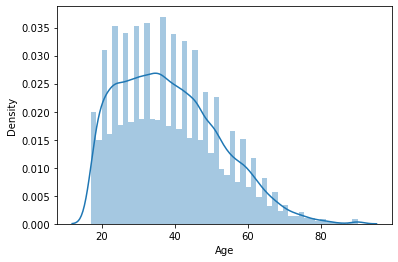

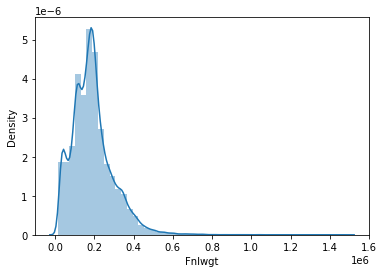

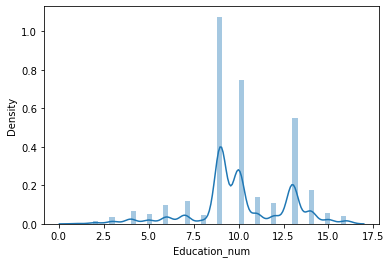

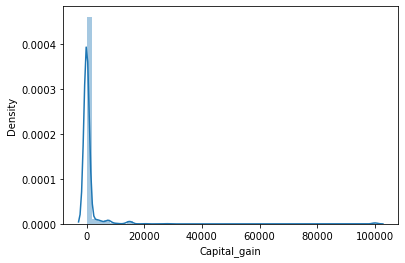

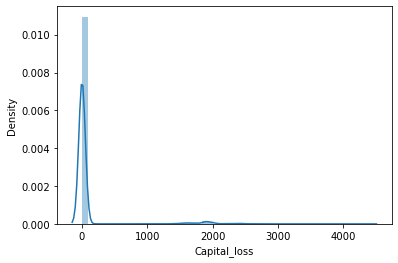

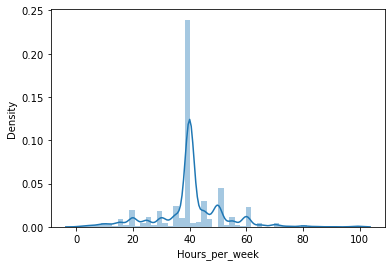

In [290]:
#Display distribution for all numerical columns.
for i in numerical_col:
    sns.distplot(df[i])
    plt.show()

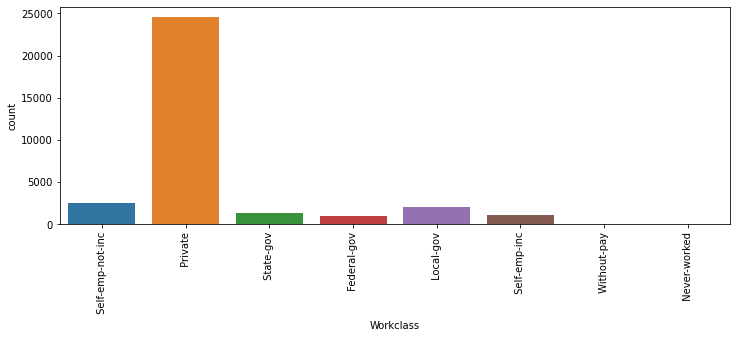

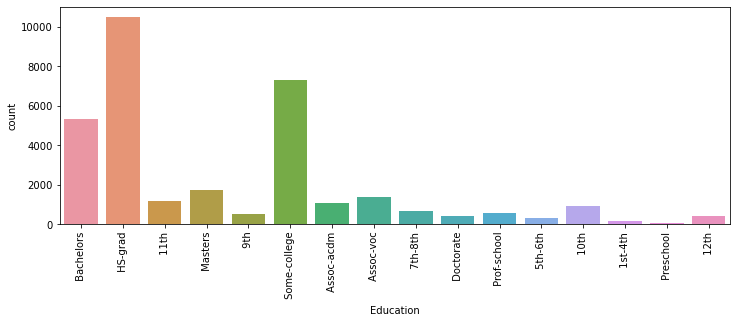

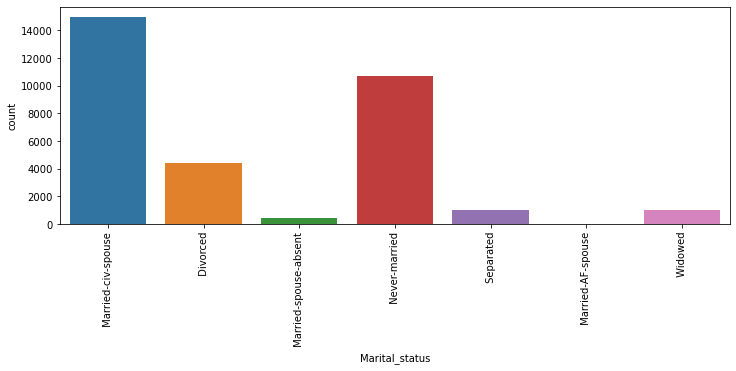

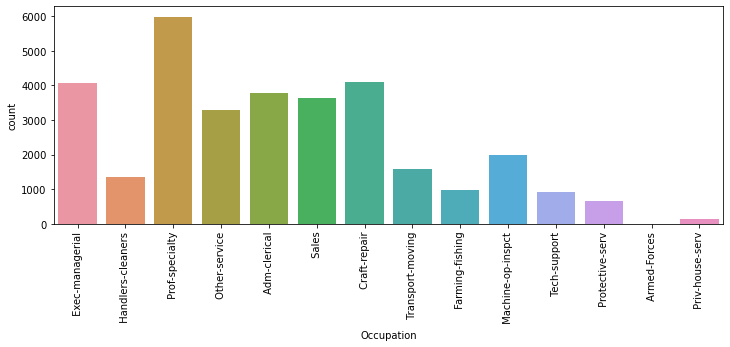

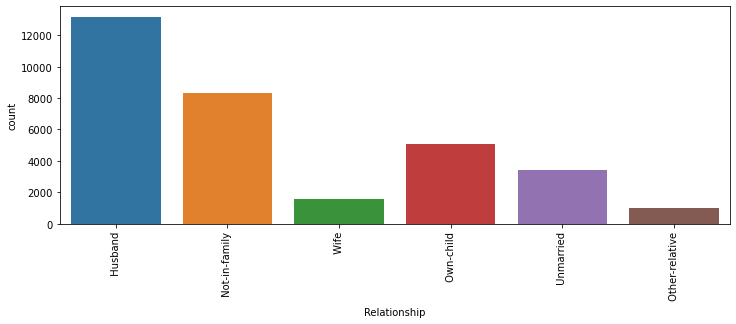

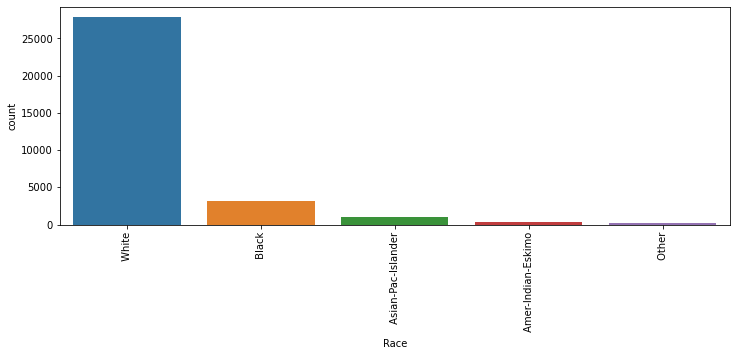

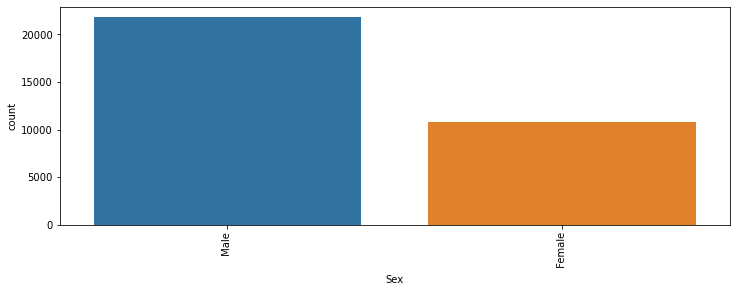

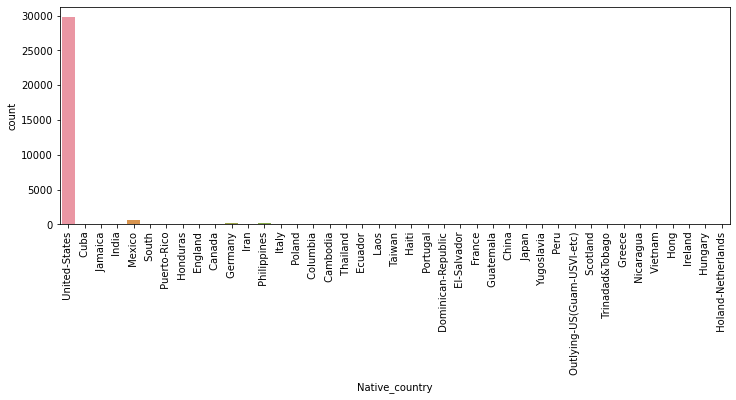

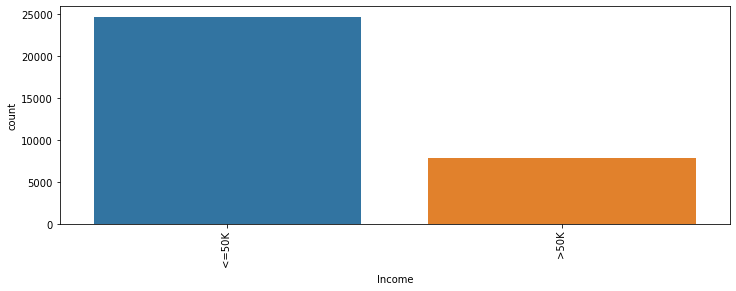

In [291]:
#Display value_counts of all categorical columns 
for i in categorical_col:
    plt.figure(figsize=(12,4))
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

#### Bivariate Analysis

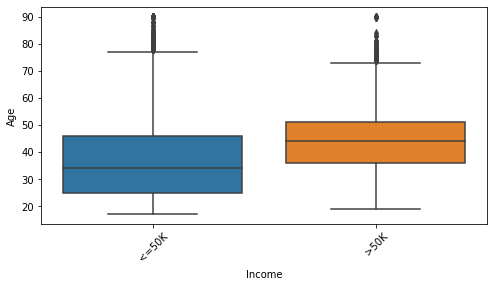

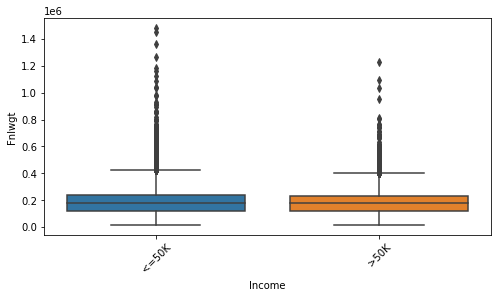

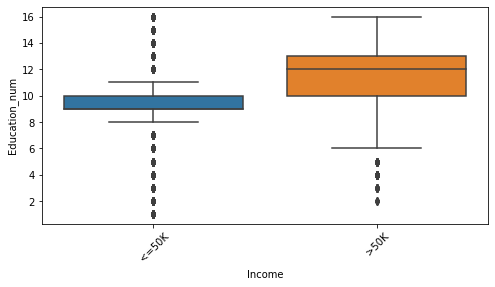

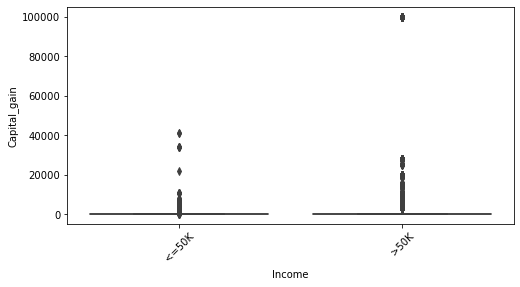

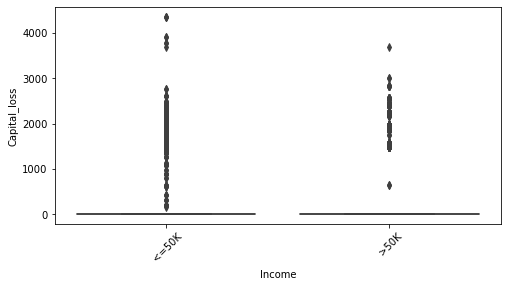

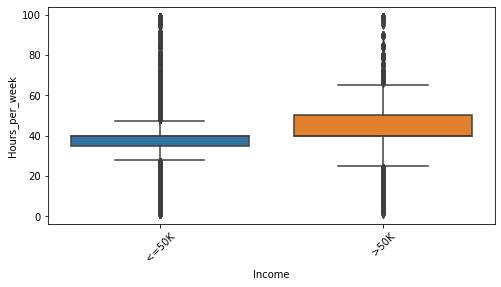

In [292]:
#For all numerical columns compare the value ranges for Income
for i in numerical_col:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df['Income'],y=df[i])
    plt.xticks(rotation=45)
    plt.show()

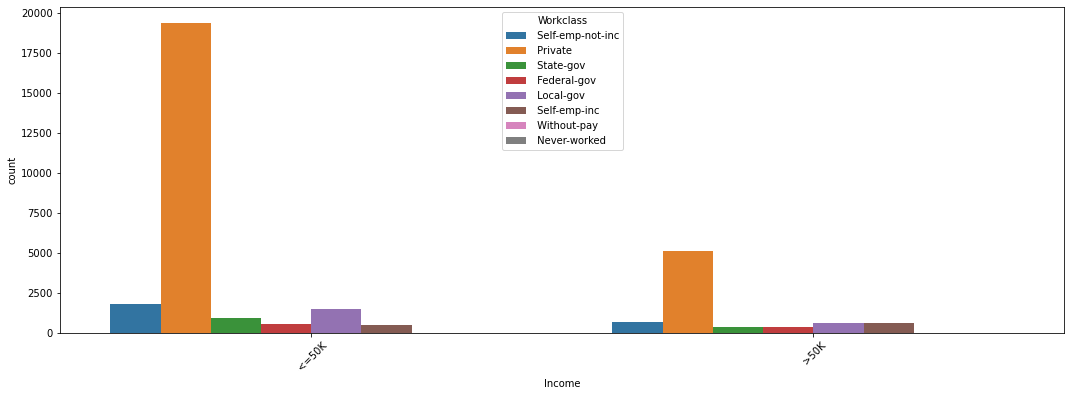

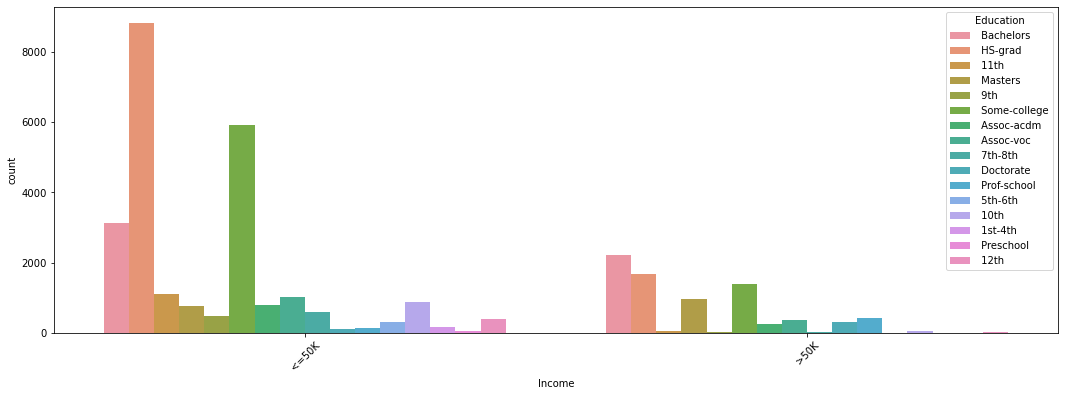

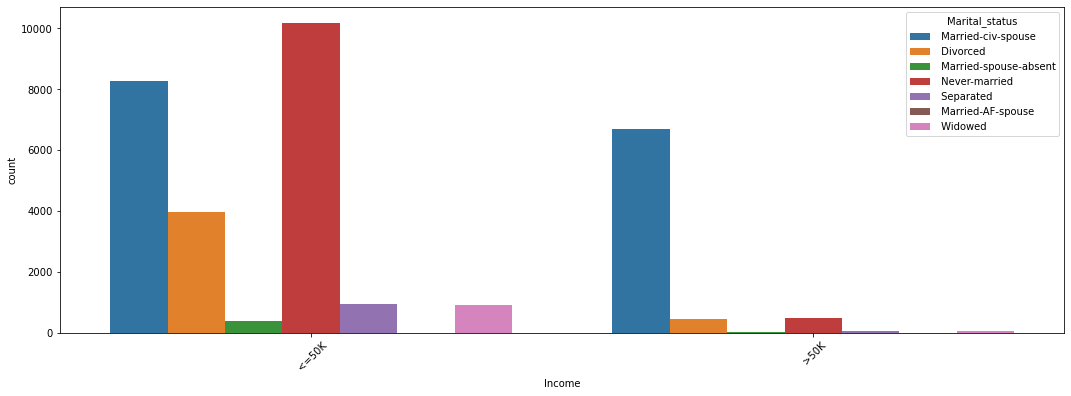

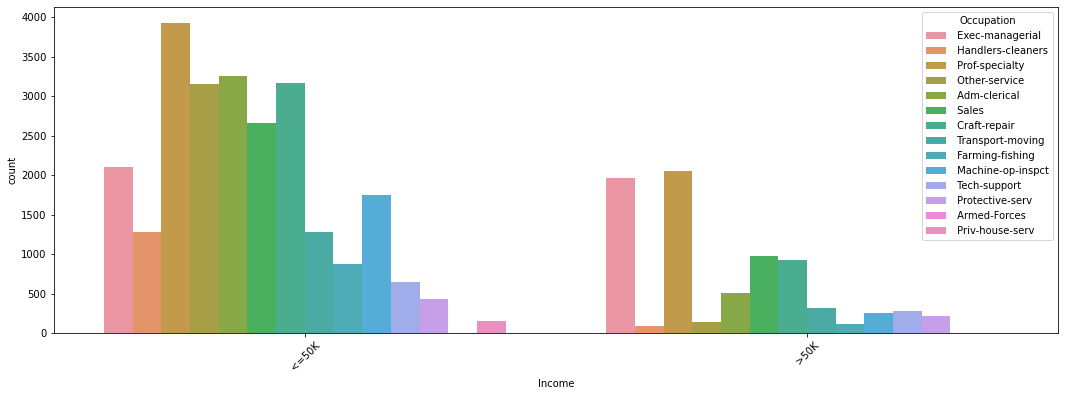

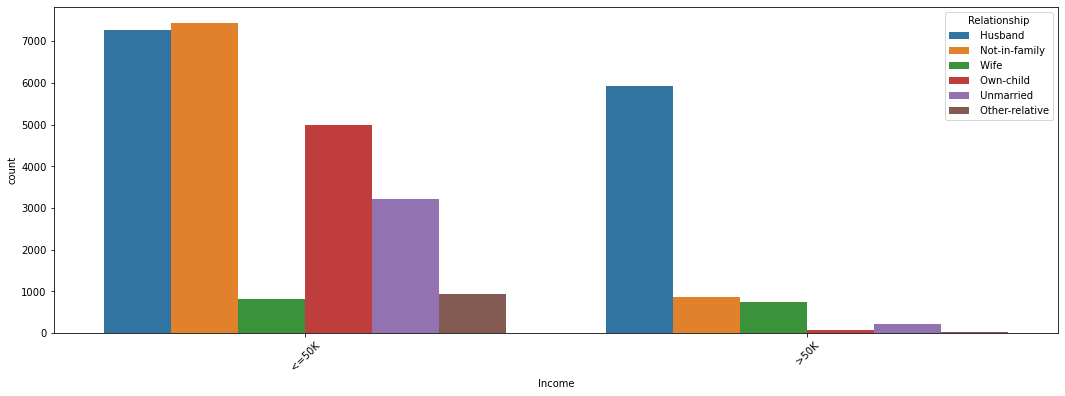

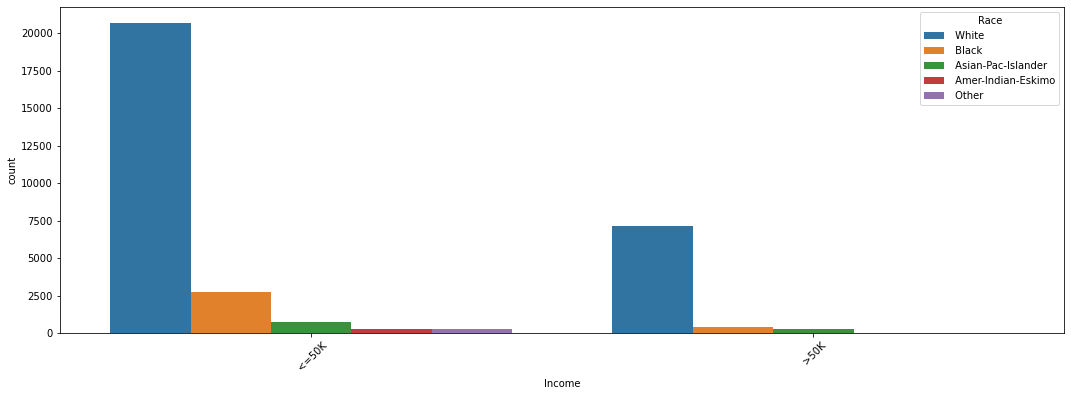

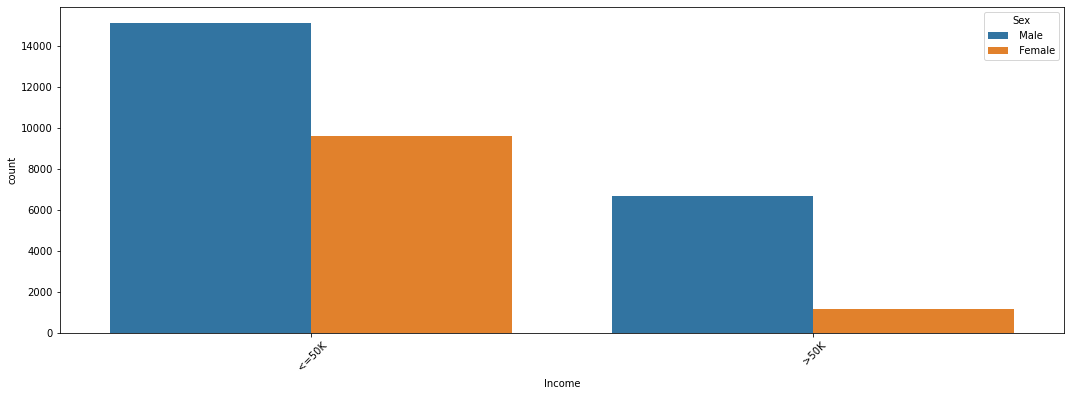

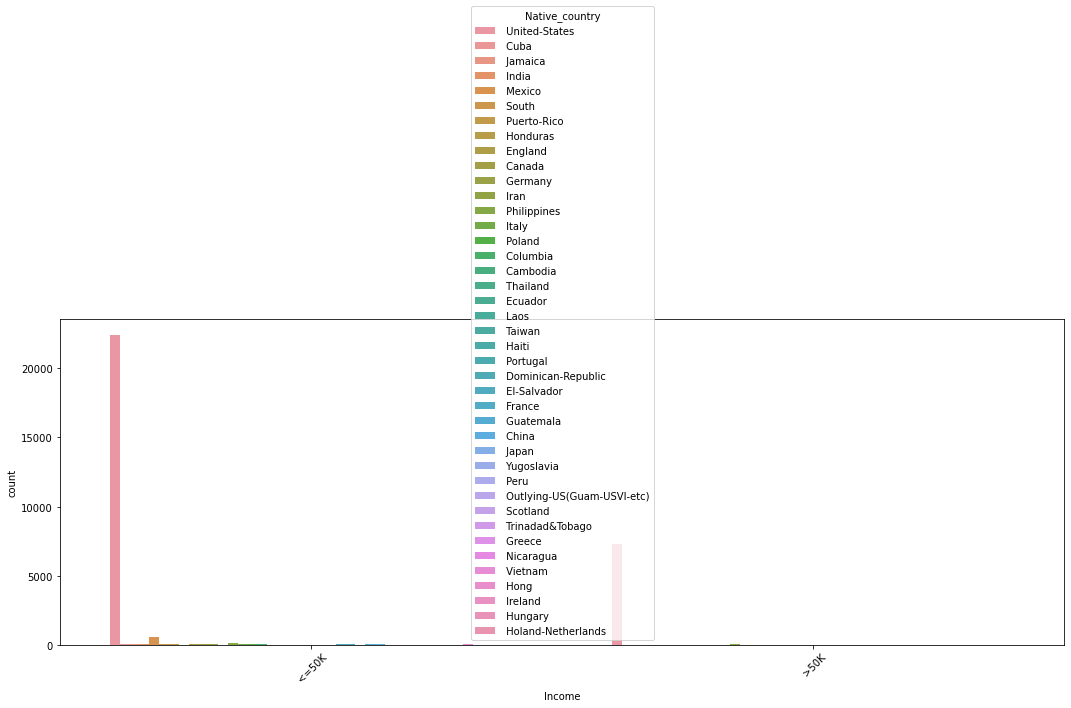

In [293]:
#compare categorical variables;
for i in categorical_col[:-1]:
    plt.figure(figsize=(18,6))
    sns.countplot(hue=df[i],x=df['Income'])
    plt.xticks(rotation=45)
    plt.show()

#### Multivariate Analysis

<AxesSubplot:>

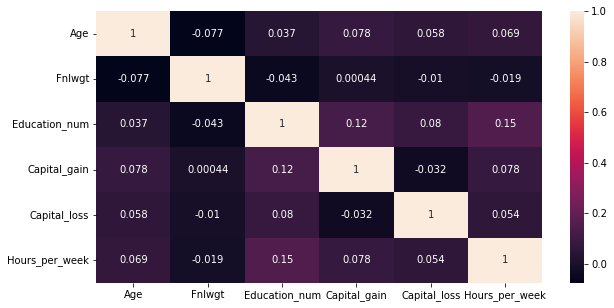

In [294]:
# Plot a heatmap using dataframe correlation values
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

### Feature Engineering

In [295]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [296]:
#converting categorical features (apart from target variable) to numerical values
categorical_col

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [297]:
df["Sex"][0]

' Male'

In [298]:
# map "Male" to 0 and "Female" to 1
df['Sex']=df['Sex'].map({' Male':0,' Female':1})

In [299]:
df['Sex']

0        0
1        0
2        0
3        1
4        1
        ..
32555    1
32556    0
32557    1
32558    0
32559    1
Name: Sex, Length: 32560, dtype: int64

In [300]:
#one hot encoding of the Workclass column
dfWorkclass=pd.get_dummies(df['Workclass'],prefix="Workclass")
dfWorkclass

,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay
0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
32555,0,0,0,1,0,0,0,0
32556,0,0,0,1,0,0,0,0
32557,0,0,0,1,0,0,0,0
32558,0,0,0,1,0,0,0,0


In [301]:
#one hot encoding of the Education column
dfEducation=pd.get_dummies(df['Education'],prefix="Education")
dfEducation

,Education_ 10th,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
32556,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32557,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32558,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [302]:
#one hot encoding of the Marital_status column
dfMarital_status=pd.get_dummies(df['Marital_status'],prefix="Marital_status")
dfMarital_status

,Marital_status_ Divorced,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed
0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
32555,0,0,1,0,0,0,0
32556,0,0,1,0,0,0,0
32557,0,0,0,0,0,0,1
32558,0,0,0,0,1,0,0


In [303]:
#one hot encoding of the Occupation column
dfOccupation=pd.get_dummies(df['Occupation'],prefix="Occupation")
dfOccupation

,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,0,0,0,0,0,0,0,0,0,0,0,1,0
32556,0,0,0,0,0,0,1,0,0,0,0,0,0,0
32557,1,0,0,0,0,0,0,0,0,0,0,0,0,0
32558,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [304]:
#one hot encoding of the Relationship column
dfRelationship=pd.get_dummies(df['Relationship'],prefix="Relationship")
dfRelationship

,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
32555,0,0,0,0,0,1
32556,1,0,0,0,0,0
32557,0,0,0,0,1,0
32558,0,0,0,1,0,0


In [305]:
#one hot encoding of the Race column
dfRace=pd.get_dummies(df['Race'],prefix="Race")
dfRace

,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,0,1
...,...,...,...,...,...
32555,0,0,0,0,1
32556,0,0,0,0,1
32557,0,0,0,0,1
32558,0,0,0,0,1


In [306]:
#one hot encoding of the Native_country column
dfNative_country=pd.get_dummies(df['Native_country'],prefix="Native_country")
dfNative_country

,Native_country_ Cambodia,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [307]:
# Concatenate the original dataframe with dataframes created for Workclass, Education, Marital_status, Occupation, Relationship, Race, Native_country values
df=pd.concat([df,dfWorkclass],axis=1)
df=pd.concat([df,dfEducation],axis=1)
df=pd.concat([df,dfMarital_status],axis=1)
df=pd.concat([df,dfOccupation],axis=1)
df=pd.concat([df,dfRelationship],axis=1)
df=pd.concat([df,dfRace],axis=1)
df=pd.concat([df,dfNative_country],axis=1)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,...,0,0,0,0,0,0,0,1,0,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,...,0,0,0,0,0,0,0,1,0,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,...,0,0,0,0,0,0,0,1,0,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,...,0,0,0,0,0,0,0,0,0,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,1,...,0,0,0,0,0,0,0,1,0,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,...,0,0,0,0,0,0,0,1,0,0
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,1,...,0,0,0,0,0,0,0,1,0,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,...,0,0,0,0,0,0,0,1,0,0


In [308]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       ...
       'Native_country_ Portugal', 'Native_country_ Puerto-Rico',
       'Native_country_ Scotland', 'Native_country_ South',
       'Native_country_ Taiwan', 'Native_country_ Thailand',
       'Native_country_ Trinadad&Tobago', 'Native_country_ United-States',
       'Native_country_ Vietnam', 'Native_country_ Yugoslavia'],
      dtype='object', length=112)

#### Check for correlation in the columns that were One-Hot-Encoded

In [309]:
ohe_cols=dfWorkclass.columns.tolist()+dfEducation.columns.tolist()+dfMarital_status.columns.tolist()+dfOccupation.columns.tolist()+dfRelationship.columns.tolist()+dfRace.columns.tolist()+dfNative_country.columns.tolist()
ohe_cols

['Workclass_ Federal-gov',
 'Workclass_ Local-gov',
 'Workclass_ Never-worked',
 'Workclass_ Private',
 'Workclass_ Self-emp-inc',
 'Workclass_ Self-emp-not-inc',
 'Workclass_ State-gov',
 'Workclass_ Without-pay',
 'Education_ 10th',
 'Education_ 11th',
 'Education_ 12th',
 'Education_ 1st-4th',
 'Education_ 5th-6th',
 'Education_ 7th-8th',
 'Education_ 9th',
 'Education_ Assoc-acdm',
 'Education_ Assoc-voc',
 'Education_ Bachelors',
 'Education_ Doctorate',
 'Education_ HS-grad',
 'Education_ Masters',
 'Education_ Preschool',
 'Education_ Prof-school',
 'Education_ Some-college',
 'Marital_status_ Divorced',
 'Marital_status_ Married-AF-spouse',
 'Marital_status_ Married-civ-spouse',
 'Marital_status_ Married-spouse-absent',
 'Marital_status_ Never-married',
 'Marital_status_ Separated',
 'Marital_status_ Widowed',
 'Occupation_ Adm-clerical',
 'Occupation_ Armed-Forces',
 'Occupation_ Craft-repair',
 'Occupation_ Exec-managerial',
 'Occupation_ Farming-fishing',
 'Occupation_ Handl

<AxesSubplot:>

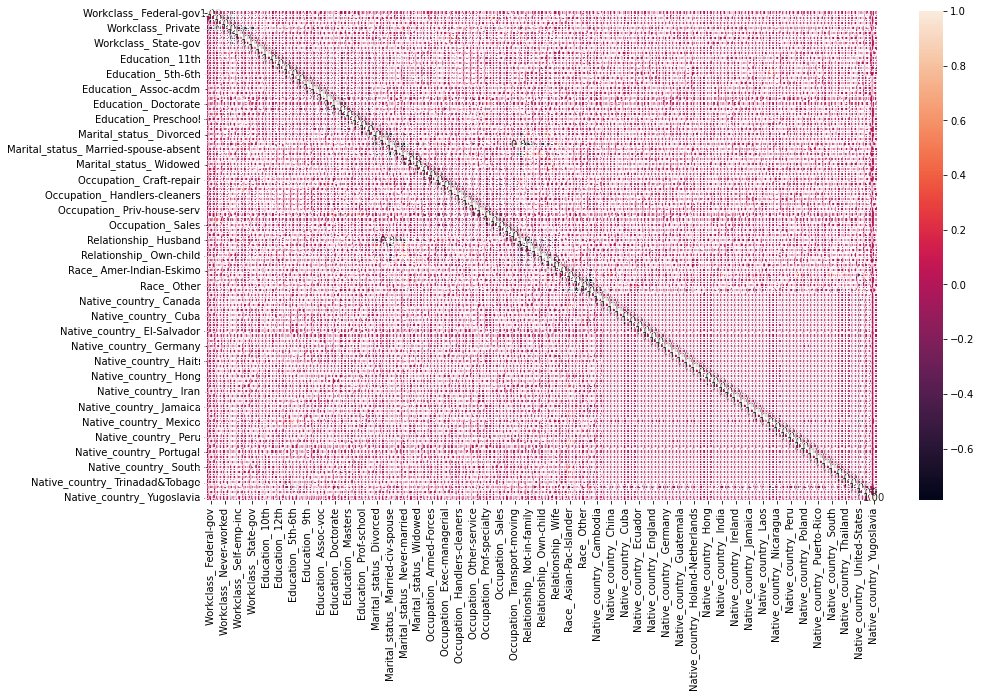

In [310]:
# Plot a heatmap using dataframe correlation values
plt.figure(figsize=(15,9))
sns.heatmap(df[ohe_cols].corr(),annot=True, fmt=".2f")

In [311]:
df.corr()[df.corr()<1].min().sort_values()

Race_ Black                          -0.788747
Race_ White                          -0.788747
Marital_status_ Married-civ-spouse   -0.644854
Marital_status_ Never-married        -0.644854
Relationship_ Husband                -0.580164
                                        ...   
Workclass_ Without-pay               -0.036256
Occupation_ Armed-Forces             -0.029067
Workclass_ Never-worked              -0.025634
Marital_status_ Married-AF-spouse    -0.024537
Native_country_ Holand-Netherlands   -0.018039
Length: 104, dtype: float64

In [312]:
df.corr()[df.corr()<1].max().sort_values()

Native_country_ Yugoslavia            0.012904
Native_country_ Ireland               0.017860
Native_country_ Scotland              0.018102
Native_country_ Greece                0.019865
Native_country_ Hungary               0.021423
                                        ...   
Education_ Bachelors                  0.503406
Relationship_ Own-child               0.509262
Marital_status_ Never-married         0.509262
Marital_status_ Married-civ-spouse    0.893208
Relationship_ Husband                 0.893208
Length: 104, dtype: float64

correlation is not that high, we will check their vif values for handling multicollinearity.

In [313]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       ...
       'Native_country_ Portugal', 'Native_country_ Puerto-Rico',
       'Native_country_ Scotland', 'Native_country_ South',
       'Native_country_ Taiwan', 'Native_country_ Thailand',
       'Native_country_ Trinadad&Tobago', 'Native_country_ United-States',
       'Native_country_ Vietnam', 'Native_country_ Yugoslavia'],
      dtype='object', length=112)

In [314]:
# Drop columns for which we have already made dummy columns
df.drop(columns=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Native_country'],inplace=True)

In [315]:
df.columns

Index(['Age', 'Fnlwgt', 'Education_num', 'Sex', 'Capital_gain', 'Capital_loss',
       'Hours_per_week', 'Income', 'Workclass_ Federal-gov',
       'Workclass_ Local-gov',
       ...
       'Native_country_ Portugal', 'Native_country_ Puerto-Rico',
       'Native_country_ Scotland', 'Native_country_ South',
       'Native_country_ Taiwan', 'Native_country_ Thailand',
       'Native_country_ Trinadad&Tobago', 'Native_country_ United-States',
       'Native_country_ Vietnam', 'Native_country_ Yugoslavia'],
      dtype='object', length=105)

In [316]:
# Create X with all independent variable
X=df.drop(columns=["Income"])
X

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,83311,13,0,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,1,0,0,38,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32556,40,154374,9,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,58,151910,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,22,201490,9,0,0,0,20,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [317]:
# Create y with only target variable
y=df['Income']
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32555     <=50K
32556      >50K
32557     <=50K
32558     <=50K
32559      >50K
Name: Income, Length: 32560, dtype: object

In [318]:
df.isna().sum()

Age                                0
Fnlwgt                             0
Education_num                      0
Sex                                0
Capital_gain                       0
                                  ..
Native_country_ Thailand           0
Native_country_ Trinadad&Tobago    0
Native_country_ United-States      0
Native_country_ Vietnam            0
Native_country_ Yugoslavia         0
Length: 105, dtype: int64

In [319]:
#As there are lots of columns we'll handle multicolliniarity by using PCA
pca = PCA()
#plot the graph to find the principal components
X_pca = pca.fit_transform(X)
X_pca

array([[-1.06470844e+05, -1.07418759e+03, -9.33594291e+01, ...,
         2.40661133e-10,  3.89731630e-11,  1.32889574e-15],
       [ 2.58641559e+04, -1.07825870e+03, -8.81599053e+01, ...,
        -1.32749272e-10,  7.92687035e-11, -6.92551175e-16],
       [ 4.49391558e+04, -1.07884367e+03, -8.73839187e+01, ...,
         1.41638581e-10, -1.37347555e-11,  1.52040980e-14],
       ...,
       [-3.78718442e+04, -1.07629430e+03, -9.06141500e+01, ...,
         1.99931130e-13,  3.12187369e-12, -1.14277820e-17],
       [ 1.17081561e+04, -1.07782796e+03, -8.87810415e+01, ...,
         3.03850466e-12,  2.43769847e-12,  4.33766589e-17],
       [ 9.81456171e+04,  1.39434960e+04, -5.93216103e+01, ...,
         6.52999516e-12, -2.10700805e-15,  1.06605247e-16]])

In [320]:
# Check the cumulative sum of variance ratio to decide on the acceptable loss in variance.
np.cumsum(pca.explained_variance_ratio_)

array([0.99511348, 0.99998548, 0.99999997, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [321]:
# As we can see using 5 components the loss in variance is less than 10% so we'll use only 7 components.
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
X_pca

array([[-1.06470844e+05, -1.07418759e+03, -9.33594291e+01,
         2.96037118e+00, -2.91361301e+01],
       [ 2.58641559e+04, -1.07825870e+03, -8.81599053e+01,
        -2.55213387e-02, -1.11696260e-01],
       [ 4.49391558e+04, -1.07884367e+03, -8.73839187e+01,
         1.45968736e+01, -4.23709783e+00],
       ...,
       [-3.78718442e+04, -1.07629430e+03, -9.06141500e+01,
         1.85726460e+01, -5.50850768e+00],
       [ 1.17081561e+04, -1.07782796e+03, -8.87810415e+01,
        -2.10073685e+01, -1.50141009e+01],
       [ 9.81456171e+04,  1.39434960e+04, -5.93216103e+01,
         1.15066408e+01, -5.30661962e+00]])

### Model Building

In [322]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, stratify=y, test_size=0.25, random_state=80)

In [323]:
X_train

array([[-1.43924844e+05, -1.07303201e+03, -9.47871618e+01,
         6.90086919e+00, -2.46337005e+00],
       [-7.36188440e+04, -1.07519602e+03, -9.20393877e+01,
         5.70575396e+00, -1.95542825e+00],
       [-3.52888441e+04, -1.07637456e+03, -9.05241802e+01,
         1.10324625e+01,  7.85944249e-01],
       ...,
       [ 1.10802156e+05, -1.08087475e+03, -8.48638651e+01,
        -1.26630109e+01,  3.63120015e+00],
       [-6.01908440e+04, -1.07561022e+03, -9.15271730e+01,
        -8.61331580e-01, -2.38837297e-02],
       [-7.39668437e+04, -1.07519181e+03, -9.21422892e+01,
        -2.57161976e+01, -1.38778535e+01]])

In [324]:
X_test

array([[-6.43398439e+04, -1.07548402e+03, -9.17104832e+01,
        -1.05549688e+01,  2.65228047e+00],
       [ 2.27875156e+05, -1.08447719e+03, -8.02745442e+01,
        -1.36047534e+01,  1.45369214e+01],
       [-5.67388439e+04, -1.07571665e+03, -9.13957421e+01,
        -7.77587827e+00,  1.22572316e+01],
       ...,
       [-6.72068439e+04, -1.07539328e+03, -9.17898768e+01,
        -7.07561658e+00,  2.25481085e+01],
       [-4.64508437e+04, -1.07603886e+03, -9.10683934e+01,
        -2.64244325e+01, -1.36786683e+01],
       [ 2.99551558e+04, -1.07838270e+03, -8.79727440e+01,
         1.45940549e+01, -7.34626578e+00]])

In [325]:
y_train

1177      <=50K
20507     <=50K
13018     <=50K
17130     <=50K
564       <=50K
          ...  
6278      <=50K
19856     <=50K
8199      <=50K
9487      <=50K
30299     <=50K
Name: Income, Length: 24420, dtype: object

In [326]:
y_test

1586      <=50K
3257      <=50K
24716     <=50K
7131      <=50K
4468      <=50K
          ...  
30415     <=50K
28552      >50K
31078     <=50K
27921     <=50K
32318     <=50K
Name: Income, Length: 8140, dtype: object

In [327]:
y_train.value_counts()

 <=50K    18539
 >50K      5881
Name: Income, dtype: int64

#### Class balancing of train data

In [328]:
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

In [329]:
X_train

array([[-1.43924844e+05, -1.07303201e+03, -9.47871618e+01,
         6.90086919e+00, -2.46337005e+00],
       [-7.36188440e+04, -1.07519602e+03, -9.20393877e+01,
         5.70575396e+00, -1.95542825e+00],
       [-3.52888441e+04, -1.07637456e+03, -9.05241802e+01,
         1.10324625e+01,  7.85944249e-01],
       ...,
       [-5.19091525e+04,  6.22212591e+03, -7.85536493e+01,
         1.13343378e+01, -3.76876977e+00],
       [-1.57952846e+05, -1.07259746e+03, -9.52967799e+01,
         2.32096004e+01, -2.96629142e+00],
       [-1.61396129e+05, -1.07249336e+03, -9.54583731e+01,
         7.76289816e+00,  5.94592892e+00]])

In [330]:
y_train.value_counts()

 <=50K    18539
 >50K     18539
Name: Income, dtype: int64

#### logistic Regression

In [331]:
# Fit the Logistic Regression model
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [332]:
#Predict on train data
y_train_pred=lr.predict(X_train)
y_train_pred

array([' <=50K', ' <=50K', ' >50K', ..., ' >50K', ' >50K', ' >50K'],
      dtype=object)

In [333]:
# Print the accuracy on train data
accuracy_score(y_train,y_train_pred)

0.6953179783159825

In [334]:
#Predict on test data
y_test_pred=lr.predict(X_test)
y_test_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [335]:
# Print the confusion matrix which has the TruePositive, FalsePositive, FalseNegative and TrueNegative counts 
confusion_matrix(y_test,y_test_pred)

array([[4309, 1871],
       [ 631, 1329]], dtype=int64)

In [336]:
# Print the accuracy on test data
accuracy_score(y_test,y_test_pred)

0.6926289926289926

#### Random Forest

In [337]:
# Fit the Random Forest Classifier model
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [338]:
#Predict on train data
y_train_pred=rf.predict(X_train)
y_train_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' >50K', ' >50K'],
      dtype=object)

In [339]:
# Print the accuracy on train data
accuracy_score(y_train,y_train_pred)

0.9999730298290092

In [340]:
# Predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [341]:
# Print the confusion matrix on test data
confusion_matrix(y_test,y_test_pred)

array([[4959, 1221],
       [ 749, 1211]], dtype=int64)

In [342]:
# Print the accuracy on test data
accuracy_score(y_test,y_test_pred)

0.757985257985258

The Random forest classifier has better accuracy score in test data than Logistic regression.
But in Random forest model as we can see the train accuracy score is almost 100% but the test accuracy score is significantly lower, this means model is overfitting.

Let's do hyperparameter tuning to handle overfitting

#### Hyperparameter tuning

In [343]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [362]:
param_grid = {
    'bootstrap': [True],
    #'max_depth': [20, 25, 30],
    'max_depth': [30],
    #'min_samples_split': [3, 4, 5],
    #'min_samples_leaf': [1, 2, 3],
    #'max_features': [0.3, 0.4, 0.5],
    #'max_features': ["auto", "sqrt", "log2"],
    'max_features': ["sqrt"],
    #'n_estimators': [50, 100, 150, 200]
    'n_estimators': [150]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = 1, verbose = 10)

In [363]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START bootstrap=True, max_depth=30, max_features=sqrt, n_estimators=150
[CV 1/5; 1/1] END bootstrap=True, max_depth=30, max_features=sqrt, n_estimators=150;, score=0.749 total time=   7.7s
[CV 2/5; 1/1] START bootstrap=True, max_depth=30, max_features=sqrt, n_estimators=150
[CV 2/5; 1/1] END bootstrap=True, max_depth=30, max_features=sqrt, n_estimators=150;, score=0.789 total time=   7.6s
[CV 3/5; 1/1] START bootstrap=True, max_depth=30, max_features=sqrt, n_estimators=150
[CV 3/5; 1/1] END bootstrap=True, max_depth=30, max_features=sqrt, n_estimators=150;, score=0.846 total time=   8.9s
[CV 4/5; 1/1] START bootstrap=True, max_depth=30, max_features=sqrt, n_estimators=150
[CV 4/5; 1/1] END bootstrap=True, max_depth=30, max_features=sqrt, n_estimators=150;, score=0.837 total time=   8.1s
[CV 5/5; 1/1] START bootstrap=True, max_depth=30, max_features=sqrt, n_estimators=150
[CV 5/5; 1/1] END bootstrap=True, max_depth

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [30],
                         'max_features': ['sqrt'], 'n_estimators': [150]},
             verbose=10)

In [364]:
best_params=grid_search.best_params_
print(best_params)

{'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 150}


In [365]:
#Fit the random forest classifier model
rf=RandomForestClassifier(**best_params)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, max_features='sqrt', n_estimators=150)

In [366]:
#Predict on train data
y_train_pred=rf.predict(X_train)
y_train_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' >50K', ' >50K'],
      dtype=object)

In [367]:
# Print the accuracy on train data
accuracy_score(y_train,y_train_pred)

0.9990560440153191

In [368]:
# Predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [369]:
# Print the confusion matrix on test data
confusion_matrix(y_test,y_test_pred)

array([[4923, 1257],
       [ 735, 1225]], dtype=int64)

In [370]:
# Print the accuracy on test data
accuracy_score(y_test,y_test_pred)

0.7552825552825553

After hyperparameter tuning there isn't much change in the train and test accuracy. As random forest gives better results, we'll go ahead with that.

In [371]:
# Saving the best model
pickle.dump(lr, open('model_census_income_classification.pkl', 'wb'))